In [2]:
import seaborn as sns  
import pandas as pd  
import numpy as np     
import matplotlib.pyplot as plt    
from scipy import stats

In [3]:
flights = sns.load_dataset("flights")

In [4]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [6]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

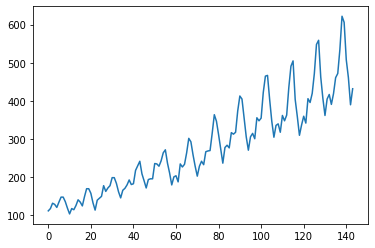

In [8]:
flights.passengers.plot();

In [9]:
flights_copy = flights.copy()

In [10]:
flights_copy.loc[np.random.randint(1,144, 20), "passengers"] = None

In [11]:
flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

<AxesSubplot:>

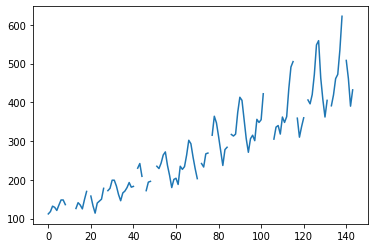

In [12]:
flights_copy.passengers.plot()

<AxesSubplot:>

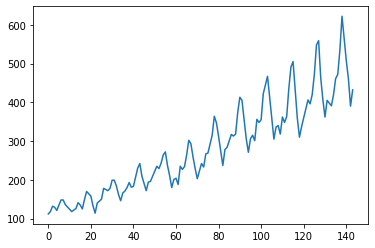

In [13]:
flights_copy["passengers"].interpolate().plot()

In [15]:
flights.passengers.median()

265.5

In [16]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include= ['float64', 'int64'])
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


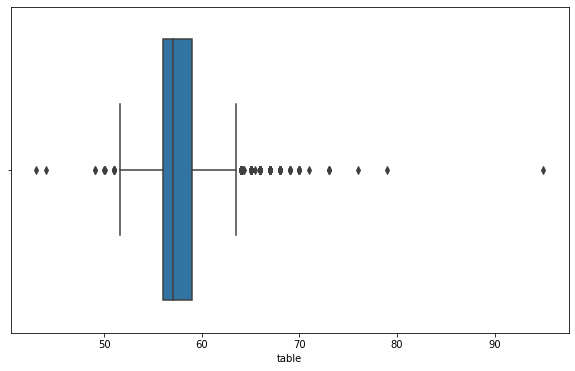

In [21]:
plt.figure(figsize= (10,6))
sns.boxplot(x = df.table);

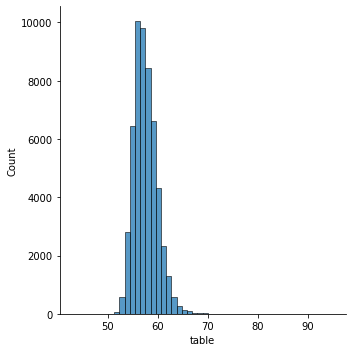

In [22]:
sns.displot(df.table, bins=50, kde=False)

In [24]:
df.table.sort_values().tail(10)

23067    70.0
43705    70.0
44938    71.0
51391    73.0
49375    73.0
52861    73.0
52860    73.0
51342    76.0
50773    79.0
24932    95.0
Name: table, dtype: float64

In [25]:
df.table.sort_values().tail(10).index

Int64Index([23067, 43705, 44938, 51391, 49375, 52861, 52860, 51342, 50773,
            24932],
           dtype='int64')

In [26]:
df.loc[df.table.sort_values().tail(10).index]

,carat,depth,table,price,x,y,z
23067,1.51,58.4,70.0,11102,7.55,7.39,4.36
43705,0.67,57.2,70.0,1436,5.82,5.75,3.31
44938,0.68,58.0,71.0,1633,5.85,5.70,3.35
51391,0.71,55.6,73.0,2368,6.01,5.96,3.33
49375,0.70,62.0,73.0,2100,5.65,5.54,3.47
52861,0.50,79.0,73.0,2579,5.21,5.18,4.09
52860,0.50,79.0,73.0,2579,5.21,5.18,4.09
51342,0.79,65.3,76.0,2362,5.52,5.13,3.35
50773,0.81,68.8,79.0,2301,5.26,5.20,3.58
24932,2.01,58.6,95.0,13387,8.32,8.31,4.87


In [29]:
q1 = df.table.quantile(0.25)

In [30]:
q3 = df.table.quantile(0.75)

In [31]:
iqr = q3 - q1
iqr

3.0

In [32]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [35]:
low_lim = q1-(1.5*iqr)
up_lim = q3+(1.5*iqr)
low_lim, up_lim

(51.5, 63.5)

In [36]:
(df.table>up_lim).sum()

589

In [37]:
(df.table<low_lim).sum()

16

In [38]:
df.table[(df.table>up_lim) | (df.table<low_lim)].count()

605

In [39]:
df.table[(df.table<=up_lim) & (df.table>=low_lim)].count()

53335

In [41]:
not_outliers = (df.table<=up_lim) & (df.table>=low_lim)

In [42]:
df[not_outliers]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [43]:
cleaned_df = df[not_outliers]

In [45]:
df.loc[(df.table>up_lim) | (df.table<low_lim)]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


In [46]:
outlier_index = df.loc[(df.table>up_lim) | (df.table<low_lim)].index

In [47]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


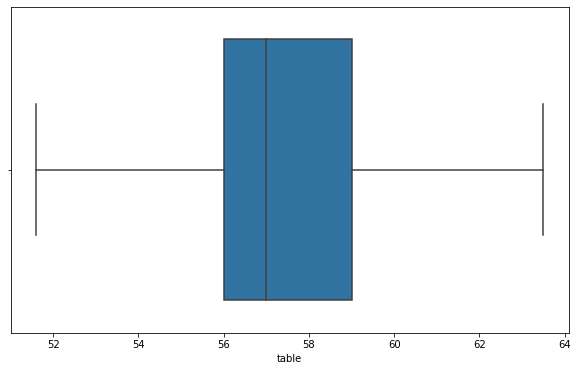

In [49]:
plt.figure(figsize= (10,6))
sns.boxplot(x = cleaned_df.table);

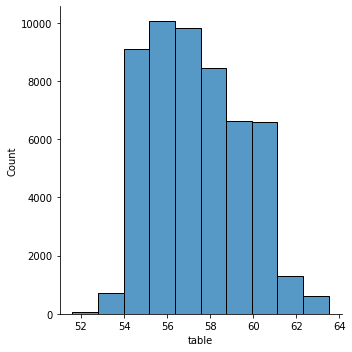

In [51]:
sns.displot(cleaned_df.table, bins = 10, kde = False);

In [52]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [53]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [56]:
from scipy.stats.mstats import winsorize

In [58]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [57]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In [61]:
a = len(df.table[df.table<low_lim])/len(df)
a

0.00029662588060808305

In [62]:
b = len(df.table[df.table>up_lim])/len(df)
b

0.010919540229885057

In [64]:
table_win = winsorize(df.table, (a,b))
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [66]:
df_table_win = pd.Series(table_win)
df_table_win

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [67]:
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [68]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [69]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [72]:
df.table.sort_values().head(10)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
Name: table, dtype: float64

In [74]:
df_table_win.sort_values().head(10)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
dtype: float64

In [75]:
x = np.linspace(0,10,10) 
x

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

<AxesSubplot:xlabel='carat'>

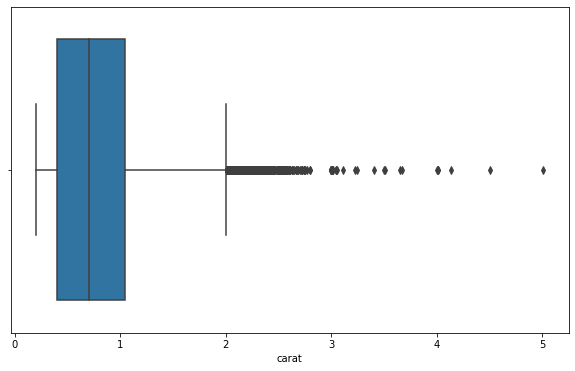

In [4]:
plt.figure(figsize= (10,6))
sns.boxplot(x = df.carat)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [6]:
np.log(df.carat)

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<AxesSubplot:xlabel='carat'>

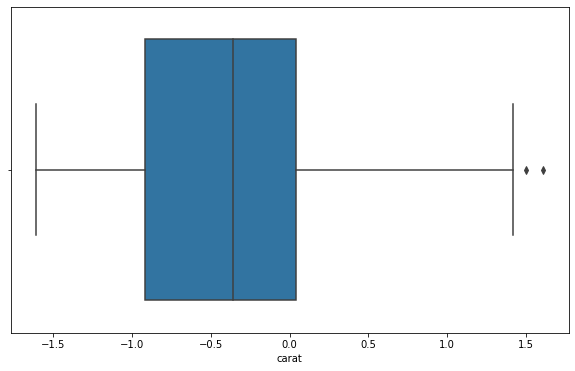

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x=np.log(df.carat))

In [9]:
df["carat_log"] = np.log(df.carat)
df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [10]:
q1 = df.carat_log.quantile(0.25)
q3 = df.carat_log.quantile(0.75)
iqr = q3 - q1 
q1, q3, iqr

(-0.916290731874155, 0.03922071315328133, 0.9555114450274363)

In [13]:
low_lim2 = q1 - (1.5 * iqr)
up_lim2 = q3 + (1.5 * iqr)
low_lim2, up_lim2

(-2.3495578994153097, 1.472487880694436)

In [14]:
df.loc[(df.carat_log>up_lim2)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [15]:
outlier_index = df.loc[(df.carat_log>up_lim2)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [16]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [17]:
df_cleaned = df.drop(outlier_index)